# Org 5

## Defaults By Income 

datawork.mk_critical_info - hb2_nmi, /tuca/scores/00093
datawork.mk_application_more - mk_TU_risk_Oct2022_score, channel_hb

A failure to meet the legal obligations of a loan, which means the borrower has missed payments or has otherwise failed to fulfill the loan agreement. 
- 'isFPD = 0' no default on first payment; 
- 'isFPD = 1' default on first payment, 
- 'isFPD = 2' exception case which we want to exclude from the analysis

Trends of defaults by income (nmi HB2) in FORA (org 5), measure against scores. 

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt 
import pymysql
import numpy as np
from time import perf_counter
import time
import helper_functions as hf

In [2]:
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
limit = 2627345182 ## 2024-05-17
difference = 200000
lower = 2561893664 ## 2023-08-02
upper = lower+difference

i=0
timestart = time.time()
while lower <= limit:
    time0=time.time()
    temp = pd.read_sql("""
    SELECT lead_sequence_id, organization_id, insert_date, decision, rule_description, lead_source_id, lead_provider_name
    FROM datawork.mk_application
    WHERE lead_sequence_id > """ + str(lower) + """
    AND lead_sequence_id <= """ + str(upper) + """
    AND organization_id in (5)
    AND decision = 'ACCEPT'
    
    ;""", con=conn)
    
    lower = lower + difference
    upper = upper + difference
    
    if i==0:
        leads_a = temp.copy()
    else:
        leads_a = pd.concat([leads_a, temp], ignore_index=True)
    i+=1    
    print(time.time()-time0)
    print(temp.shape)
    print("lower:",lower)
    
conn.close()

print('total time: ', time.time()-timestart)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/664233461.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp = pd.read_sql("""


11.712498188018799
(25, 7)
lower: 2562093664
9.513545989990234
(23, 7)
lower: 2562293664
9.4041109085083
(25, 7)
lower: 2562493664
9.745719194412231
(23, 7)
lower: 2562693664
9.994204998016357
(41, 7)
lower: 2562893664
9.155905723571777
(36, 7)
lower: 2563093664
7.645843744277954
(28, 7)
lower: 2563293664
8.530202150344849
(28, 7)
lower: 2563493664
7.8884499073028564
(28, 7)
lower: 2563693664
7.268727779388428
(37, 7)
lower: 2563893664
7.882598876953125
(29, 7)
lower: 2564093664
7.712233781814575
(39, 7)
lower: 2564293664
7.651230335235596
(26, 7)
lower: 2564493664
11.466173887252808
(23, 7)
lower: 2564693664
8.400418758392334
(27, 7)
lower: 2564893664
6.960397958755493
(38, 7)
lower: 2565093664
7.99107027053833
(34, 7)
lower: 2565293664
8.086664199829102
(29, 7)
lower: 2565493664
8.706378936767578
(32, 7)
lower: 2565693664
7.98415994644165
(32, 7)
lower: 2565893664
8.093314170837402
(25, 7)
lower: 2566093664
8.642382860183716
(21, 7)
lower: 2566293664
7.7378599643707275
(21, 7)
lower:

6.757751941680908
(63, 7)
lower: 2599493664
6.964868783950806
(57, 7)
lower: 2599693664
6.856565952301025
(78, 7)
lower: 2599893664
6.967660188674927
(168, 7)
lower: 2600093664
6.957566976547241
(49, 7)
lower: 2600293664
6.557207822799683
(59, 7)
lower: 2600493664
7.6799070835113525
(44, 7)
lower: 2600693664
7.199386119842529
(43, 7)
lower: 2600893664
7.001293182373047
(45, 7)
lower: 2601093664
8.01633596420288
(50, 7)
lower: 2601293664
7.059218168258667
(42, 7)
lower: 2601493664
6.621082067489624
(79, 7)
lower: 2601693664
8.852578163146973
(45, 7)
lower: 2601893664
6.447702169418335
(46, 7)
lower: 2602093664
6.780529975891113
(55, 7)
lower: 2602293664
7.048031330108643
(59, 7)
lower: 2602493664
7.471157073974609
(37, 7)
lower: 2602693664
7.070335149765015
(86, 7)
lower: 2602893664
7.061861276626587
(60, 7)
lower: 2603093664
6.6585962772369385
(44, 7)
lower: 2603293664
7.036101818084717
(39, 7)
lower: 2603493664
6.890890836715698
(42, 7)
lower: 2603693664
7.265883922576904
(44, 7)
lowe

In [3]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, mk_TU_risk_Oct2022_score as TUrs
    FROM datawork.mk_application_more 
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        TUrs_df = temp.copy()
    else:
        TUrs_df = pd.concat([TUrs_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/1070603417.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.6720621585845947
0
(372, 2)
0.6997518539428711
1
(372, 2)
0.6462740898132324
2
(372, 2)
0.6802661418914795
3
(372, 2)
0.7205381393432617
4
(372, 2)
0.7100050449371338
5
(372, 2)
0.6137897968292236
6
(372, 2)
0.6168110370635986
7
(372, 2)
0.7146461009979248
8
(372, 2)
0.7148330211639404
9
(372, 2)
0.7187800407409668
10
(372, 2)
0.6257359981536865
11
(372, 2)
0.7080690860748291
12
(372, 2)
0.6106569766998291
13
(372, 2)
0.6124510765075684
14
(372, 2)
0.5800261497497559
15
(372, 2)
0.6424272060394287
16
(372, 2)
0.6178431510925293
17
(372, 2)
0.6142590045928955
18
(372, 2)
0.715501070022583
19
(372, 2)
0.6173141002655029
20
(372, 2)
0.582385778427124
21
(372, 2)
0.6343669891357422
22
(372, 2)
0.7169289588928223
23
(372, 2)
0.6133739948272705
24
(372, 2)
0.512387752532959
25
(372, 2)
0.6148548126220703
26
(372, 2)
0.6144561767578125
27
(372, 2)
0.6127312183380127
28
(372, 2)
0.5921630859375
29
(372, 2)
0.6192398071289062
30
(372, 2)
0.7254321575164795
31
(372, 2)
0.6380879878997803
32
(3

In [4]:
iters=50
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT lead_sequence_id, hb2_nmi, `/tuca/scores/00093` as bureau_score
    FROM datawork.mk_critical_info
    WHERE lead_sequence_id in """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        nmi_df = temp.copy()
    else:
        nmi_df = pd.concat([nmi_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.21268391609191895
0
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.207716703414917
1
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20340299606323242
2
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20474600791931152
3
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20716094970703125
4
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20641112327575684
5
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.20554685592651367
6
(0, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.5329420566558838
7
(136, 3)


/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3441653524.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nmi_df = pd.concat([nmi_df, temp], ignore_index=True)


0.8135778903961182
8
(372, 3)
0.7095317840576172
9
(372, 3)
0.7371280193328857
10
(372, 3)
0.7044780254364014
11
(372, 3)
0.81538987159729
12
(372, 3)
0.8214321136474609
13
(372, 3)
0.7585489749908447
14
(372, 3)
0.6975588798522949
15
(372, 3)
0.691155195236206
16
(372, 3)
0.8299422264099121
17
(372, 3)
0.8128139972686768
18
(372, 3)
0.7720141410827637
19
(359, 3)
0.8517191410064697
20
(372, 3)
0.7845189571380615
21
(372, 3)
0.7023417949676514
22
(372, 3)
0.7654411792755127
23
(372, 3)
0.8162508010864258
24
(372, 3)
0.7604429721832275
25
(372, 3)
0.8724780082702637
26
(372, 3)
0.8083949089050293
27
(372, 3)
0.9345800876617432
28
(372, 3)
0.6969742774963379
29
(372, 3)
0.8017771244049072
30
(372, 3)
0.7521119117736816
31
(372, 3)
0.754040002822876
32
(372, 3)
0.8759620189666748
33
(372, 3)
0.8173840045928955
34
(372, 3)
0.7158279418945312
35
(372, 3)
0.7152788639068604
36
(372, 3)
0.7476828098297119
37
(372, 3)
0.8309600353240967
38
(372, 3)
0.7728888988494873
39
(372, 3)
0.751362085342

In [5]:
leads_a.lead_provider_name.value_counts()

lead_provider_name
Loans Canada     12771
Fora Internal     2170
LoanConnect       1782
Borrowell         1383
Smarter Loans      478
Loanz CA            12
FORA-TEST            8
Name: count, dtype: int64

In [6]:
leads_more = pd.merge(left=leads_a, right=TUrs_df, on='lead_sequence_id', how='left')
leads_more = pd.merge(left=leads_more, right=nmi_df, on='lead_sequence_id', how='left')
leads_more.shape

(18604, 10)

In [8]:
fpd_df = hf.get_more_fpd(leads_a)

We will excecute 1 iterations:



/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc/helper_functions.py:405: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_payments =  pd.read_sql("""


Query successful
exceptions count:  2
Runtime:  5.461470365524292


/Users/ethan.tait/Library/CloudStorage/OneDrive-PropelHoldingsInc/helper_functions.py:405: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_payments =  pd.read_sql("""


Query successful
exceptions count:  119
Runtime:  3.54662823677063


drop all exceptions => drop all when isFPD = 2

In [9]:
fpd_df = fpd_df[fpd_df['isFPD'] != 2]

In [10]:
fpd_df.head()

,lead_sequence_id,item_date,payment_schedule_id,status,payment_mode,total_amount,payment_sequence,customer_id,base_loan_id,isFPD
0,2561896639,2023-08-25,6917311,cleared,ach,37.73,1,4119923,5536113,0
1,2561906917,2023-08-24,6914856,cleared,ach,40.55,1,4120157,5536400,0
2,2561929488,2023-08-24,6915389,cleared,ach,21.42,1,4120494,5536834,0
3,2562004726,2023-08-31,6917083,cleared,ach,63.23,1,4121503,5538096,0
4,2562034383,2023-08-18,6918475,cleared,ach,14.10,1,4121959,5538647,0


In [11]:
final_df = pd.merge(left=leads_more, right=fpd_df, on='lead_sequence_id', how='left')
final_df.shape

(18765, 19)

In [12]:
final_df.head()

,lead_sequence_id,organization_id,insert_date,decision,rule_description,lead_source_id,lead_provider_name,TUrs,hb2_nmi,bureau_score,item_date,payment_schedule_id,status,payment_mode,total_amount,payment_sequence,customer_id,base_loan_id,isFPD
0,2561895653,5,2023-08-02 00:22:49,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,761.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2561896639,5,2023-08-02 00:33:45,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,703.0,NaN,NaN,2023-08-25,6917311.0,cleared,ach,37.73,1.0,4119923.0,5536113.0,0.0
2,2561898457,5,2023-08-02 00:56:37,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2561900838,5,2023-08-02 01:32:09,ACCEPT,Fora Accept Rule - CV 590 Risk 700,2413,Loans Canada,851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2561902931,5,2023-08-02 02:06:47,ACCEPT,IDC Pass,2412,Loans Canada,629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
final_df = final_df[final_df['lead_provider_name'] != 'FORA-TEST']

In [17]:
final_df = final_df[final_df['lead_provider_name'] != 'Loanz CA']

In [18]:
final_df.lead_provider_name.value_counts()

lead_provider_name
Loans Canada     12871
Fora Internal     2201
LoanConnect       1793
Borrowell         1399
Smarter Loans      481
Name: count, dtype: int64

In [19]:
final_df.organization_id.value_counts()

organization_id
5    18745
Name: count, dtype: int64

In [20]:
final_df.isFPD.value_counts()

isFPD
0.0    4404
1.0     148
Name: count, dtype: int64

In [21]:
def create_decile_buckets(df, score_column, nmi_column, fpd_column):
    df['decile'] = pd.qcut(df[score_column], 20, labels=False) + 1
    # use pivot to restructure df so that default and non default counts means and stds are in separate columns
    income_stats = df.groupby(['decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='decile', columns=fpd_column, values = ['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    score_stats = df.groupby('decile')[score_column].agg(['min', 'max']).reset_index()
    
    ##total_counts = df.groupby(['decile', fpd_column])[score_column].count().unstack(fill_value=0)
    ##total_counts.columns = ['non_default', 'default']
    ##total_counts['total'] = total_counts['non_default'] + total_counts['default']
    
    ##total_counts['default_rate'] = total_counts['default'] / total_counts['total'] * 100
    result = pd.merge(score_stats, income_stats_pivot, on='decile')
    return result

tu_decile_stats = create_decile_buckets(final_df, 'TUrs', 'hb2_nmi', 'isFPD')
bureau_decile_stats = create_decile_buckets(final_df, 'bureau_score', 'hb2_nmi', 'isFPD')

### TU score and Vantage Score buckets with nmi

In [22]:
print("TU Risk Score Decile Stats")
print(tu_decile_stats)
print("Bureau Score Decile Stats")
print(bureau_decile_stats)

TU Risk Score Decile Stats
    decile    min    max  count_0  count_1       mean_0       mean_1  \
0      1.0  519.0  605.0    156.0     13.0  4206.113013  3312.233846   
1      2.0  606.0  629.0    175.0     11.0  4154.065600  3281.044545   
2      3.0  630.0  651.0    161.0      7.0  6091.258758  3320.520000   
3      4.0  652.0  673.0    152.0      5.0  5121.716711  3457.024000   
4      5.0  674.0  694.0    149.0      4.0  3962.950604  2037.510000   
5      6.0  695.0  706.0    165.0      5.0  4343.349818  7725.650000   
6      7.0  707.0  716.0    207.0     13.0  4499.973285  4921.150000   
7      8.0  717.0  726.0    181.0      6.0  3950.235028  3503.166667   
8      9.0  727.0  736.0    194.0      4.0  4031.956959  4160.952500   
9     10.0  737.0  746.0    167.0      4.0  4285.372515  4106.845000   
10    11.0  747.0  757.0    156.0      3.0  3925.614423  3685.996667   
11    12.0  758.0  769.0    185.0      9.0  3941.842811  3321.723333   
12    13.0  770.0  780.0    179.0    

### Default Rates by Income 

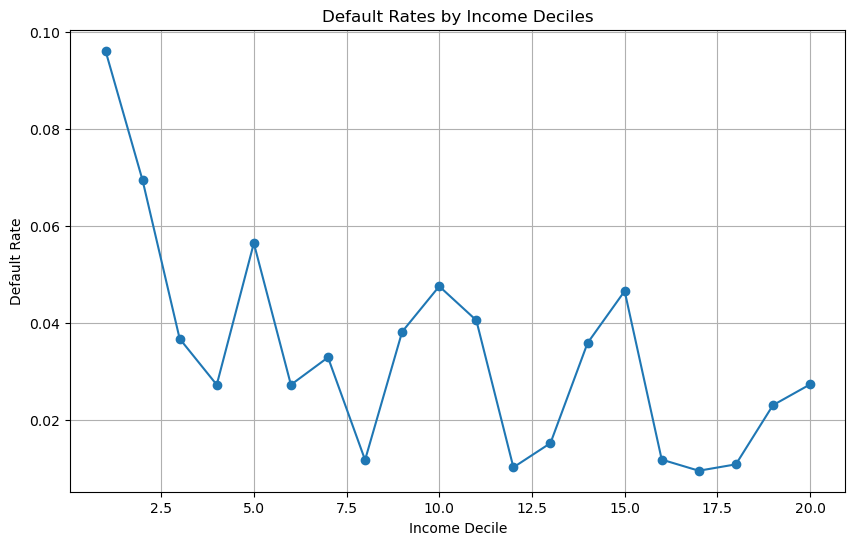

In [23]:
def plot_default_rates_by_income_deciles(df, score_column, nmi_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 20, labels=False) + 1
    default_rates = df.groupby('income_decile')['isFPD'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(default_rates['income_decile'], default_rates['isFPD'], marker='o')
    plt.title('Default Rates by Income Deciles')
    plt.xlabel('Income Decile')
    plt.ylabel('Default Rate')
    plt.grid(True)
    plt.show()
    
plot_default_rates_by_income_deciles(final_df, 'TUrs', 'hb2_nmi')

In [24]:
def create_income_decile_buckets_with_default_rate(df, nmi_column, fpd_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 20, labels=False) + 1
    income_stats = df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    income_stats_interval = df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
    result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
    return result

income_decile_stats = create_income_decile_buckets_with_default_rate(final_df, 'hb2_nmi', 'isFPD')
print("Income Decile Stats with Default Rates")
print(income_decile_stats)

Income Decile Stats with Default Rates
    income_decile      min        max  count_0  count_1        mean_0  \
0             1.0     2.17    1537.50     94.0     10.0   1317.554362   
1             2.0  1538.36    1929.88    134.0     10.0   1744.639328   
2             3.0  1932.00    2200.00    157.0      6.0   2069.654650   
3             4.0  2200.20    2445.32    178.0      5.0   2336.294270   
4             5.0  2447.00    2618.09    167.0     10.0   2550.000898   
5             6.0  2619.54    2816.71    178.0      5.0   2737.439270   
6             7.0  2817.73    3033.00    176.0      6.0   2941.165682   
7             8.0  3033.27    3206.72    167.0      2.0   3123.803353   
8             9.0  3209.36    3375.00    176.0      7.0   3288.539545   
9            10.0  3375.03    3553.39    180.0      9.0   3466.767000   
10           11.0  3553.56    3765.46    189.0      8.0   3657.859101   
11           12.0  3767.78    3996.35    192.0      2.0   3879.035156   
12          

In [25]:
correlation_matrix = final_df[['hb2_nmi',  'TUrs', 'bureau_score', 'isFPD']].corr()
print("Correlation Matrix")
correlation_matrix

Correlation Matrix


,hb2_nmi,TUrs,bureau_score,isFPD
hb2_nmi,1.000000,0.018714,0.031384,-0.021429
TUrs,0.018714,1.000000,0.002326,-0.058523
bureau_score,0.031384,0.002326,1.000000,-0.024354
isFPD,-0.021429,-0.058523,-0.024354,1.000000


#### No correlation strong enough - all are very weak  

In [29]:
def create_income_decile_buckets_with_default_rate_by_provider(df, nmi_column, fpd_column, provider_column):
    results = []
    lead_providers = df[provider_column].unique()
    for provider in lead_providers:
        provider_df = df[df[provider_column] == provider].copy()
        provider_df['income_decile'] = pd.qcut(provider_df[nmi_column], 10, labels=False) + 1
        income_stats = provider_df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
        income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
        income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
        income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
        income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
        income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
        income_stats_interval = provider_df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
        result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
        result[provider_column] = provider
        results.append(result)
    final_result = pd.concat(results, ignore_index=True)
    return final_result

income_by_provider = create_income_decile_buckets_with_default_rate_by_provider(final_df, 'hb2_nmi', 'isFPD', 'lead_provider_name')

In [30]:
print("Income with FPD rates by Lead Provider for FORA")
print(income_by_provider)

Income with FPD rates by Lead Provider for FORA
    income_decile      min        max  count_0  count_1        mean_0  \
0             1.0     2.17    1950.00    134.0      4.0   1572.476866   
1             2.0  1950.03    2469.98    199.0      4.0   2224.346080   
2             3.0  2470.00    2816.71    221.0      7.0   2652.293529   
3             4.0  2817.73    3189.00    200.0      2.0   3010.210400   
4             5.0  3190.01    3504.44    224.0      9.0   3340.272143   
5             6.0  3504.55    3913.06    234.0      8.0   3711.655641   
6             7.0  3913.39    4441.74    237.0      8.0   4160.451055   
7             8.0  4442.56    5200.08    225.0      7.0   4805.193067   
8             9.0  5202.25    6500.10    249.0      1.0   5838.305944   
9            10.0  6509.96  168952.77    222.0      7.0  10901.449324   
10            1.0   220.00    1750.00     10.0      4.0   1379.482000   
11            2.0  1767.91    2314.04     19.0      4.0   2077.895263   
12 

## Excel

In [66]:
with pd.ExcelWriter('decile_stats.xlsx', engine='xlsxwriter') as writer:
    tu_decile_stats.to_excel(writer, sheet_name='TU Risk Score', index=False)
    bureau_decile_stats.to_excel(writer, sheet_name='Bureau Score', index=False)
    income_decile_stats.to_excel(writer, sheet_name='Income', index=False)
    
    workbook = writer.book
    header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
    
    for sheet_name in ['TU Risk Score', 'Bureau Score', 'Income']:
        worksheet = writer.sheets[sheet_name]
        
        for col_num, value in enumerate(tu_decile_stats.columns.values):
            worksheet.write(0, col_num, value, header_format)
        
        worksheet.set_column('A:A', 12)
        worksheet.set_column('B:B', 12)
        worksheet.set_column('C:C', 15)
        worksheet.set_column('D:D', 15)
        worksheet.set_column('E:E', 15)
        worksheet.set_column('F:F', 15)
        worksheet.set_column('G:G', 12)
        worksheet.set_column('H:H', 12)
        
    for sheet_name in ['Income']:
        worksheet = writer.sheets[sheet_name]
        chart = workbook.add_chart({'type': 'column'})
        chart.add_series({
            'name': 'Default Rate', 'categories': [sheet_name, 1, 0, 10, 0],
            'values': [sheet_name, 1, 5, 10, 5]
        })
        
        chart.set_title({'name': 'Default Rate by Income'})
        chart.set_x_axis({'name': 'Income Decile'})
        chart.set_y_axis({'name': 'Default Rate (%)'})
        
        worksheet.insert_chart('M2', chart)
        
print("Excel Created Successfully")

Excel Created Successfully


## DL and Flinks

Use DL (Not really used in Canada/FORA) and Flinks to check trends of defaults by different variables. average_balance for DL, somehow replicate this in Flinks as there is no parameter
- - For flinks:
- check datawork.mk_flinks
- shared.flinks_account_detail
- - For DL:
- shared.bv_report, bv_verification_request
- map all back using base_loan_id on jaglms.lms_base_loans => lead_sequence_id

In [144]:
iters=5
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection', use_pure=True,
                              auth_plugin='mysql_native_password')
for i in range(iters):
    time1=time.time()
    temp =  pd.read_sql("""
    SELECT distinct lh.lead_sequence_id, bvr.average_balance, bvr.average_balance_recent, 
                        total_credits, total_debits
    FROM shared.bv_transaction_summary bvts
     JOIN shared.bv_report bvr ON bvr.id = bvts.report_id
     JOIN shared.bv_verification_request bvvr ON bvvr.id = bvr.bv_verification_request_id
     JOIN jaglms.lms_base_loans lbl ON lbl.base_loan_id=bvvr.base_loan_id
     JOIN jaglms.lms_loan_header lh ON lh.loan_header_id = lbl.loan_header_id
    WHERE RIGHT(bvr.account_number_entered, 4) = RIGHT(bvr.account_number_found, 4)
    AND lh.lead_sequence_id IN """ + str(tuple(leads_a.lead_sequence_id[(i*np.floor(len(leads_a)/iters)).astype(int):((i+1)*np.floor(len(leads_a)/iters)).astype(int)].to_list())) + """
    ;""", con = conn)
    print(time.time()-time1)
    print(i)
    print(temp.shape)
    if i==0:
        dl_df = temp.copy()
    else:
        dl_df = pd.concat([dl_df, temp], ignore_index=True)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_12505/2606300564.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp =  pd.read_sql("""


0.8045661449432373
0
(111, 5)
0.8206520080566406
1
(123, 5)
0.7207989692687988
2
(47, 5)
0.5058369636535645
3
(6, 5)
0.40011119842529297
4
(2, 5)


In [85]:
dl_df.shape

(289, 5)

## 30 dpd. in 90 with hb2_nmi

In [31]:
pd.options.mode.use_inf_as_na = True
days_since_origination = 90
dpd_days = 30

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/3684431059.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [32]:
# NC MK loans originated in 2023 Q3 to 2024 Q2 (Start +1 month for both) 
##Change origination_time range to alter date range
conn= mysql.connector.connect(option_files='.my.cnf', option_groups = 'mysqlconnection',use_pure=True ,
                              auth_plugin='mysql_native_password')
data_90 = pd.read_sql("""select
                            lbl.base_loan_id,
                            a.lead_provider_name,
                            mkam.mk_TU_risk_Oct2022_score as TUrs,
                            llh.lead_sequence_id,
                            la.origination_time,
                            llh.entity_name,
                            lpsi.payment_schedule_item_id,
                            lpsi.item_date,
                            lpsi.item_type,
                            lpsi.status as payment_status,
                            lpsi.total_amount,
                            lps.payment_schedule_id,
                            hb2_nmi,
                            #TIMESTAMPDIFF(DAY, la.origination_time, CURDATE()) AS days_since_origination,
                            TIMESTAMPDIFF(DAY, la.origination_time, lpsi.item_date) AS payment_days_since_origination,
                            lbl.loan_amount, 
                            a.UW_STREAM_ID,
                            la.pay_frequency,
                            (select if(lpsi2.status in ('Return', 'MISSED'), 1, 0) from jaglms.lms_payment_schedule_items lpsi2
                            where lpsi2.payment_schedule_id = lps.payment_schedule_id and lps.is_collections!=1 and (lpsi2.item_type != 'C' OR lpsi2.item_type is null) order by item_date limit 1) as isFPD
                            from jaglms.lms_loan_header llh
                            INNER JOIN datawork.mk_application_more mkam on llh.lead_sequence_id = mkam.lead_sequence_id
                            inner join jaglms.lms_base_loans lbl on llh.loan_header_id = lbl.loan_header_id
                            inner join jaglms.lms_payment_schedules lps on lps.base_loan_id = lbl.base_loan_id
                            inner join jaglms.lms_payment_schedule_items lpsi on (lps.payment_schedule_id = lpsi.payment_schedule_id) #and lps.is_collections = 0)
                            inner join dwh.rpt_leads_accepted la on la.lead_sequence_id = llh.lead_sequence_id
                            inner join datawork.mk_application a on llh.lead_sequence_id = a.lead_sequence_id
                            inner join datawork.mk_critical_info mkc on llh.lead_sequence_id = mkc.lead_sequence_id
                            where
                            llh.loan_header_id is not null 
                            and (lpsi.payment_mode != 'CONCESSION' or lpsi.payment_mode is null)
                            and lbl.loan_status !='Pending' 
                            and llh.status not in ('void', 'withdraw', 'Credit Return', 'Closed','closed') 
                            and lpsi.status not in ('scheduled','cancelled','SENT','bypass','Correction','Pending')
                            and la.IsApplicationTest = 0
                            and llh.is_returning = 0
                            and llh.last_name not in ('Schwartzenegger', 'Goler')
                            and la.application_status = 'Originated'
                            and la.origination_time >= '2023-08-02' and la.origination_time <= '2024-05-17'
                            AND la.organization_id =5
                            and TIMESTAMPDIFF(DAY, la.origination_time, lpsi.item_date) <= """+str(days_since_origination)+"""
                            and (lpsi.item_type != 'C' OR lpsi.item_type is null)
                            ;""", con = conn)
conn.close()

print(data_90.shape)

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/2904700754.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_90 = pd.read_sql("""select


(16990, 18)


In [33]:
data_90.head()

,base_loan_id,lead_provider_name,TUrs,lead_sequence_id,origination_time,entity_name,payment_schedule_item_id,item_date,item_type,payment_status,total_amount,payment_schedule_id,hb2_nmi,payment_days_since_origination,loan_amount,UW_STREAM_ID,pay_frequency,isFPD
0,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,59229696,2023-10-26,D,cleared,16.20,7392491,3397.0,23,4550.0,85,B,0.0
1,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,59753051,2023-11-09,D,cleared,28.52,7392491,3397.0,37,4550.0,85,B,0.0
2,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,60361444,2023-11-23,D,cleared,63.39,7392491,3397.0,51,4550.0,85,B,0.0
3,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,60915292,2023-12-07,D,cleared,102.51,7392491,3397.0,65,4550.0,85,B,0.0
4,5918350,Loans Canada,835.0,2577054165,2023-10-02 14:42:44,NB LOC BSW,61582535,2023-12-21,D,cleared,123.82,7392491,3397.0,79,4550.0,85,B,0.0


In [34]:
data_90['payment_status'] = data_90['payment_status'].str.lower().copy()

In [35]:
print(data_90.shape)
data_90 = data_90[data_90['payment_status'].isin(['return', 'missed', 'cleared'])]
print(data_90.shape)

(16990, 18)
(16990, 18)


In [36]:
data_90.sort_values(['base_loan_id','item_date'],inplace=True)

In [37]:
data_90['item_date'] = pd.to_datetime(data_90['item_date'])

In [38]:
# exclude missed payments after day60 (not enough time to see if they are recovered)
print(data_90.shape)
data_90 = data_90[~ ((data_90.payment_days_since_origination >(days_since_origination-dpd_days)) &
                     (data_90.payment_status.isin(['return','missed'])))]
print(data_90.shape)

(16990, 18)
(16456, 18)


In [39]:
#set 30+dpd as 0 for all payments
data_90['Ever_30DPD_in_90']=0

In [46]:
# if the missed payment is +30 dpd
# look for missed payments, if to payment amount is not paid in the next 30 days
for i in data_90[data_90.payment_status.isin(['return','missed'])].base_loan_id.unique():
    for j in data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed']))].payment_schedule_item_id.unique():
        data_90.loc[((data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)),'Ever_30DPD_in_90']= 1         
        if ((data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['cleared'])) & (data_90.item_date> (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])) & ((data_90.item_date - (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])).dt.days<= dpd_days)].total_amount.sum()) >= data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)].total_amount).bool():
            data_90.loc[((data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)),'Ever_30DPD_in_90']= 0
data_90_label = data_90.groupby(['lead_sequence_id'])['Ever_30DPD_in_90'].max().to_frame()

/var/folders/3s/_6crr0fn3yq77k0g_2_fkn00g58sl3/T/ipykernel_8716/1215208305.py:6: FutureWarning: Series.bool is now deprecated and will be removed in future version of pandas
  if ((data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['cleared'])) & (data_90.item_date> (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])) & ((data_90.item_date - (data_90[data_90.payment_schedule_item_id==j].item_date.values[0])).dt.days<= dpd_days)].total_amount.sum()) >= data_90[(data_90.base_loan_id==i) & (data_90.payment_status.isin(['return','missed'])) & (data_90.payment_schedule_item_id==j)].total_amount).bool():


In [47]:
data_90_label = data_90.groupby(['lead_sequence_id'])['Ever_30DPD_in_90'].max().to_frame()

In [48]:
data_90_label['Ever_30DPD_in_90'].value_counts()

Ever_30DPD_in_90
0    3465
1     163
Name: count, dtype: int64

In [49]:
data_90_label['Ever_30DPD_in_90'].value_counts(dropna=False,normalize=True)

Ever_30DPD_in_90
0    0.955072
1    0.044928
Name: proportion, dtype: float64

In [65]:
data_90_label

,Ever_30DPD_in_90
lead_sequence_id,
2577054165,0
2577331966,0
2577380136,0
2577381055,0
2577393515,0
...,...
2627102289,0
2627171056,0
2627177916,0


In [56]:
final_df_1 = pd.merge(left=final_df, right=data_90_label, on='lead_sequence_id', how='left')

In [57]:
def create_income_decile_buckets_with_default_rate_by_provider_2(df, nmi_column, fpd_column, provider_column, dpd_column):
    results = []
    lead_providers = df[provider_column].unique()
    for provider in lead_providers:
        provider_df = df[df[provider_column] == provider].copy()
        provider_df['income_decile'] = pd.qcut(provider_df[nmi_column], 10, labels=False) + 1
        income_stats = provider_df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
        income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
        income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
        income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
        income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
        income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
        income_stats_interval = provider_df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
        result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
        result[provider_column] = provider
        dpd_stats = provider_df.groupby('income_decile')[dpd_column].mean().reset_index()
        result = pd.merge(result, dpd_stats, on='income_decile')
        results.append(result)
    final_result = pd.concat(results, ignore_index=True)
    return final_result

income_by_provider_2 = create_income_decile_buckets_with_default_rate_by_provider_2(final_df_1, 'hb2_nmi', 'isFPD', 'lead_provider_name', 'Ever_30DPD_in_90')

In [59]:
print("Income Stats with Default Rates & 30DPD in 90 by Lead Provider")
print(income_by_provider_2)

Income Stats with Default Rates & 30DPD in 90 by Lead Provider
    income_decile      min        max  count_0  count_1        mean_0  \
0             1.0     2.17    1950.00    134.0      4.0   1572.476866   
1             2.0  1950.03    2469.98    199.0      4.0   2224.346080   
2             3.0  2470.00    2816.71    221.0      7.0   2652.293529   
3             4.0  2817.73    3189.00    200.0      2.0   3010.210400   
4             5.0  3190.01    3504.44    224.0      9.0   3340.272143   
5             6.0  3504.55    3913.06    234.0      8.0   3711.655641   
6             7.0  3913.39    4441.74    237.0      8.0   4160.451055   
7             8.0  4442.56    5200.08    225.0      7.0   4805.193067   
8             9.0  5202.25    6500.10    249.0      1.0   5838.305944   
9            10.0  6509.96  168952.77    222.0      7.0  10901.449324   
10            1.0   220.00    1750.00     10.0      4.0   1379.482000   
11            2.0  1767.91    2314.04     19.0      4.0   207

In [68]:
with pd.ExcelWriter('income_stats_by_provider_with_dpd.xlsx', engine='xlsxwriter') as writer:
    lead_providers = income_by_provider_2['lead_provider_name'].unique()
    
    for provider in lead_providers:
        provider_df = income_by_provider_2[income_by_provider_2['lead_provider_name'] == provider]
        provider_df.to_excel(writer, sheet_name=provider, index=False)
        
        workbook = writer.book
        worksheet = writer.sheets[provider]
        header_format = workbook.add_format({'bold': True, 'text_wrap': True, 'valign': 'top', 'fg_color': '#D7E4BC', 'border': 1})
        
        for col_num, value in enumerate(provider_df.columns.values):
            worksheet.write(0, col_num, value, header_format)
        
        worksheet.set_column('A:A', 12)
        worksheet.set_column('B:B', 12)
        worksheet.set_column('C:C', 15)
        worksheet.set_column('D:D', 15)
        worksheet.set_column('E:E', 15)
        worksheet.set_column('F:F', 15)
        worksheet.set_column('G:G', 12)
        worksheet.set_column('H:H', 12)
        worksheet.set_column('I:I', 20)
        worksheet.set_column('J:J', 20)
from IPython.display import FileLink

FileLink(r'income_stats_by_provider_with_dpd')        
print("Excel Created Successfully")

Excel Created Successfully


In [64]:
def create_income_decile_buckets_with_default_rate_2(df, nmi_column, fpd_column, dpd_column):
    df['income_decile'] = pd.qcut(df[nmi_column], 10, labels=False) + 1
    income_stats = df.groupby(['income_decile', fpd_column])[nmi_column].agg(['count', 'mean', 'std']).reset_index()
    income_stats_pivot = income_stats.pivot(index='income_decile', columns=fpd_column, values=['count', 'mean', 'std']).reset_index()
    income_stats_pivot.columns = ['income_decile', 'count_0', 'count_1', 'mean_0', 'mean_1', 'std_0', 'std_1']
    income_stats_pivot.fillna({'count_0': 0, 'count_1': 0}, inplace=True)
    income_stats_pivot['total'] = income_stats_pivot['count_0'] + income_stats_pivot['count_1']
    income_stats_pivot['default_rate'] = income_stats_pivot['count_1'] / income_stats_pivot['total'] * 100
    income_stats_interval = df.groupby('income_decile')[nmi_column].agg(['min', 'max']).reset_index()
    result = pd.merge(income_stats_interval, income_stats_pivot,  on='income_decile')
    dpd_stats = df.groupby('income_decile')[dpd_column].mean().reset_index()
    result = pd.merge(result, dpd_stats, on='income_decile')
    return result

income_decile_stats_2 = create_income_decile_buckets_with_default_rate_2(final_df_1, 'hb2_nmi', 'isFPD', 'Ever_30DPD_in_90')
print("Income Decile Stats with Default Rates & 30DPD in 90")
print(income_decile_stats_2)

Income Decile Stats with Default Rates & 30DPD in 90
   income_decile      min        max  count_0  count_1        mean_0  \
0            1.0     2.17    1929.88    228.0     20.0   1568.560439   
1            2.0  1932.00    2445.32    335.0     11.0   2211.331821   
2            3.0  2447.00    2816.71    345.0     15.0   2646.708232   
3            4.0  2817.73    3206.72    343.0      8.0   3030.088397   
4            5.0  3209.36    3553.39    356.0     16.0   3378.654551   
5            6.0  3553.56    3996.35    381.0     10.0   3769.317900   
6            7.0  3997.00    4528.00    354.0      9.0   4231.644520   
7            8.0  4530.57    5386.42    350.0     11.0   4911.099514   
8            9.0  5392.92    6846.00    387.0      4.0   5993.408062   
9           10.0  6850.00  398156.00    311.0      8.0  10855.142315   

         mean_1         std_0        std_1  total  default_rate  \
0   1550.274000    251.234705   271.481208  248.0      8.064516   
1   2143.091818    1